# Import Liberies

In [66]:
!pip install xgboost

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [68]:
house_p = pd.read_csv('Housing.csv')

In [69]:
house_p.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [70]:
house_p.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [71]:
house_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [72]:
house_p.shape

(545, 13)

In [73]:
# Replace 'yes' with 1 and 'no' with 0 in the specified columns
columns_to_replace = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
house_p[columns_to_replace] = house_p[columns_to_replace].replace({'yes': 1, 'no': 0})

# Explicitly infer objects to retain the old behavior
house_p[columns_to_replace] = house_p[columns_to_replace].infer_objects()

In [74]:
# Replace values in 'furnishingstatus' column
house_p['furnishingstatus'] = house_p['furnishingstatus'].replace({
    'furnished': 1,
    'semi-furnished': 2,
    'unfurnished': 0
})
pd.set_option('future.no_silent_downcasting', True)
# Infer objects to retain the old downcasting behavior
house_p['furnishingstatus'] = house_p['furnishingstatus'].infer_objects(copy=False)

In [75]:
house_p.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,2
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,2
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


**Understanding the correlation between various features in the dataset**

1. Positive Correlation

2. Negative Correlation

In [78]:
# Convert categorical columns to numeric using one-hot encoding
house_p_encoded = pd.get_dummies(house_p)

correlation = house_p_encoded.corr()

<Axes: >

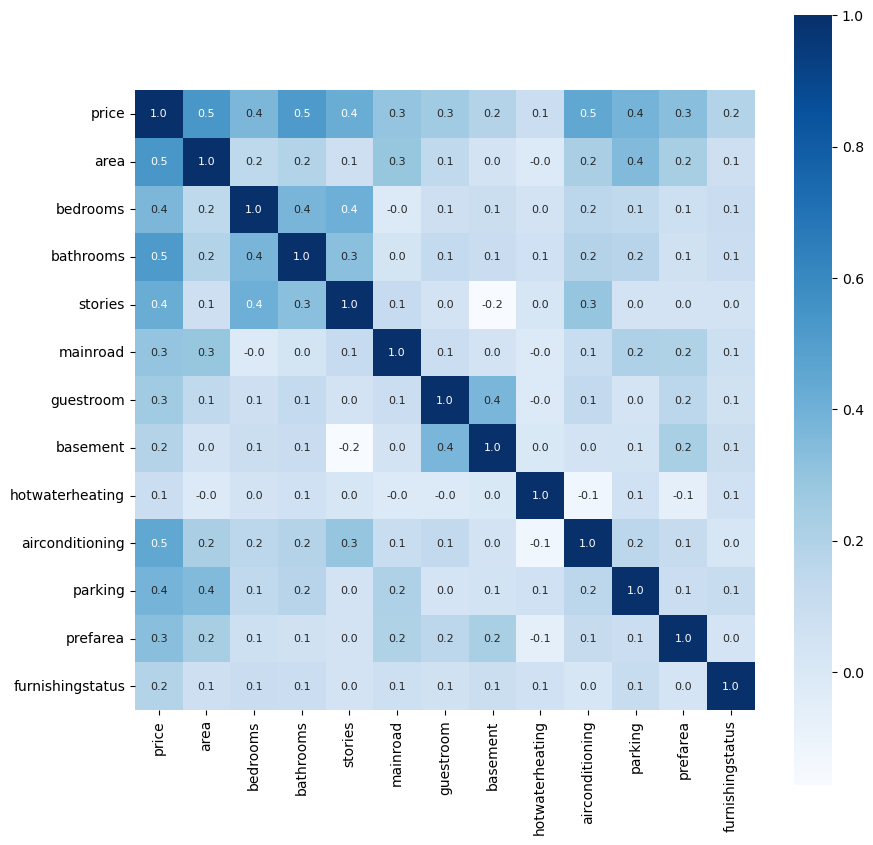

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Splitting the data and Target**

In [81]:
X = house_p.drop(['price'] , axis=1)

In [82]:
Y = house_p['price']

In [83]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1


In [84]:
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

**Splitting the data into Training data and Test data**

In [86]:
house_p_encoded = pd.get_dummies(house_p)
X_train, X_test, Y_train, Y_test = train_test_split(house_p_encoded, Y, test_size=0.2, random_state=42)

In [87]:
X_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,1
93,6300000,7200,3,2,1,1,0,1,0,1,3,0,2
335,3920000,3816,2,1,1,1,0,1,0,1,2,0,1
412,3430000,2610,3,1,2,1,0,1,0,0,0,1,0
471,3010000,3750,3,1,2,1,0,0,0,0,0,0,0


**Model Training**

In [89]:
model = XGBRegressor()

In [90]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Prediction on training data**

In [92]:
train_data_predict = model.predict(X_train)

In [93]:
train_data_predict

array([ 7525606. ,  6299501. ,  3919981.2,  3430121.5,  3010272.5,
        4620128.5,  1750151.2,  3009548. ,  2519701.8,  3709007.8,
        3703017. ,  2449717.8,  4199594.5,  3640174. ,  3639867.5,
        5383600. ,  1767440.4,  5250098.5,  3499623.8,  6789735. ,
        3920516. ,  3920754.8,  5806788. ,  5250352.5,  5950109.5,
        3499229. ,  2409650.8,  2660772.5,  5284526.5,  3674962.8,
        4199903.5,  2274960.5,  3570135.8,  4619540. ,  4199913.5,
        3087641.2,  3255675. ,  8856415. ,  3640681.2,  7343062. ,
        4690162. ,  4304927.5,  3639596.2,  4402902.5,  4269842. ,
        2939815.5,  4795097.5,  8540926. ,  4233754. ,  7697731. ,
        3500108. ,  3360328.2,  4969405.5,  3149883.8,  5530610.5,
        5880947.5,  3709942.2,  3640304.8,  8399196. ,  6082888. ,
        4759924.5,  3080478. ,  5243427.5,  7244879.5,  4551246.5,
        8574158. ,  8960068. ,  3501306.5,  6930012. ,  4613265.5,
        4340265. ,  4472555. ,  3779319.8,  6299680. ,  521539

In [94]:
# R squared error
score_1 = metrics.r2_score(Y_train, train_data_predict)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, train_data_predict)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999997335599381
Mean Absolute Error :  615.6238532110092


**Visualizing the actual Prices and predicted prices**

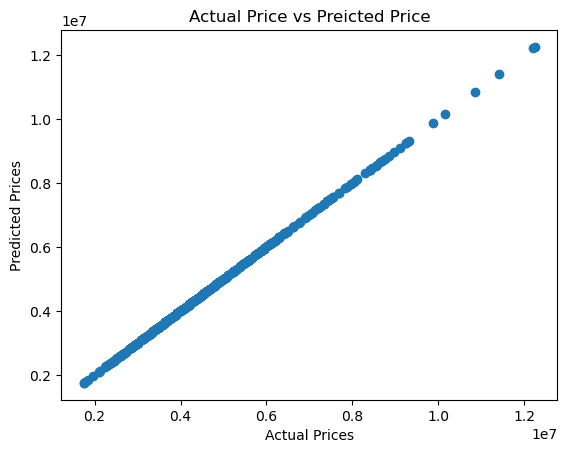

In [96]:
plt.scatter(Y_train, train_data_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

**Prediction on Test Data**

In [98]:
test_data_predict = model.predict(X_test)

In [99]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_predict)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_predict)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9966203597106554
Mean Absolute Error :  38939.543577981654
